In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
data = pd.read_excel('used_car_dataset.xlsx')

In [5]:
data = pd.DataFrame(data)

In [6]:
data.head()

,Manufacturer,Model,Made Year,Mileage,Price,Dealer,Ratings,Reviews
0,Honda,CR-V,2018,"31,360 mi.","$33,489",Motor Werks - Barrington Auto Mall,4.8,"4,656"
1,Kia,Telluride,2021,"5,665 mi.","$58,278",Dean Team Volkswagen Subaru of Ballwin,4.9,"4,685"
2,Cadillac,SRX,2012,"99,736 mi.","$14,985",Hendersonville Auto Brokers,3.9,20
3,Chevrolet,Traverse,2020,"48,705 mi.","$35,999",Vroom - Get It Delivered Nationwide,3.6,"7,870"
4,Honda,CR-V,2018,"13,221 mi.","$34,995",Valley Honda,4.9,"8,750"


In [7]:
data.shape

(24900, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24900 entries, 0 to 24899
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  24900 non-null  object 
 1   Model         24900 non-null  object 
 2   Made Year     24900 non-null  int64  
 3   Mileage       24800 non-null  object 
 4   Price         24900 non-null  object 
 5   Dealer        24900 non-null  object 
 6   Ratings       24700 non-null  float64
 7   Reviews       24800 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.5+ MB


In [9]:
data.describe()

,Made Year,Ratings
count,24900.000000,24700.000000
mean,2018.714859,4.538462
std,2.038580,0.461062
min,2005.000000,1.500000
25%,2018.000000,4.400000
50%,2019.000000,4.700000
75%,2020.000000,4.800000
max,2021.000000,5.000000


**There are null values in the Mileage, Ratings and Reviews columns. Dropping them as the data size is huge and wont affect the prediction**

In [10]:
data = data.dropna()

In [11]:
data.shape

(24600, 8)

In [12]:
df = data

In [13]:
df['Price'] = df['Price'].str.replace(r'\D', '').astype(int)
df['Mileage'] = df['Mileage'].str.replace(r'\D', '').astype(int)
df['Reviews'] = df['Reviews'].str.replace(r'\D', '').astype(int)

<ipython-input-13-f8b0830b13ee>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Price'] = df['Price'].str.replace(r'\D', '').astype(int)
<ipython-input-13-f8b0830b13ee>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Mileage'] = df['Mileage'].str.replace(r'\D', '').astype(int)
<ipython-input-13-f8b0830b13ee>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews'] = df['Reviews'].str.replace(r'\D', '').astype(int)


In [14]:
df.head()

,Manufacturer,Model,Made Year,Mileage,Price,Dealer,Ratings,Reviews
0,Honda,CR-V,2018,31360,33489,Motor Werks - Barrington Auto Mall,4.8,4656
1,Kia,Telluride,2021,5665,58278,Dean Team Volkswagen Subaru of Ballwin,4.9,4685
2,Cadillac,SRX,2012,99736,14985,Hendersonville Auto Brokers,3.9,20
3,Chevrolet,Traverse,2020,48705,35999,Vroom - Get It Delivered Nationwide,3.6,7870
4,Honda,CR-V,2018,13221,34995,Valley Honda,4.9,8750


In [15]:
df['Manufacturer'].value_counts()

Honda            4100
BMW              2300
Ford             2000
Jeep             1600
Chevrolet        1200
Mazda            1100
Toyota           1100
Mercedes-Benz    1100
Acura            1000
GMC               900
Lincoln           900
Cadillac          900
Nissan            800
Volvo             800
Lexus             700
Land              700
Kia               500
Audi              400
INFINITI          400
Dodge             400
Volkswagen        300
Porsche           300
Hyundai           300
Buick             300
Subaru            300
Jaguar            100
Lamborghini       100
Name: Manufacturer, dtype: int64

In [16]:
df['Made Year'].value_counts()

2019    8300
2020    6800
2018    3500
2021    2300
2016    1000
2017    1000
2015     800
2011     200
2012     200
2013     200
2005     100
2010     100
2014     100
Name: Made Year, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24600 entries, 0 to 24899
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  24600 non-null  object 
 1   Model         24600 non-null  object 
 2   Made Year     24600 non-null  int64  
 3   Mileage       24600 non-null  int32  
 4   Price         24600 non-null  int32  
 5   Dealer        24600 non-null  object 
 6   Ratings       24600 non-null  float64
 7   Reviews       24600 non-null  int32  
dtypes: float64(1), int32(3), int64(1), object(3)
memory usage: 1.4+ MB


In [18]:
df['Ratings'].value_counts()

4.8    5700
4.7    5100
4.9    2900
4.6    2700
4.4    1900
4.5    1300
4.3    1100
4.2     800
4.1     700
3.6     400
4.0     400
2.9     300
5.0     300
3.1     300
3.9     200
3.2     100
2.1     100
1.5     100
3.5     100
3.3     100
Name: Ratings, dtype: int64

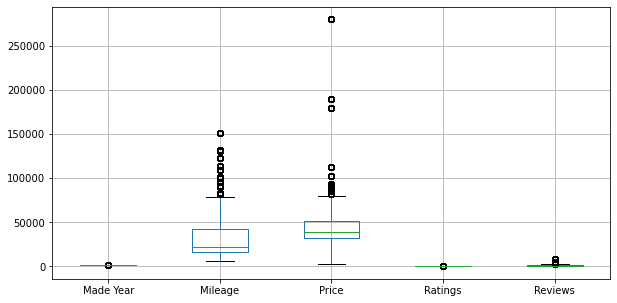

In [19]:
boxplot = df.boxplot(figsize=(10,5))

<AxesSubplot:xlabel='Price', ylabel='Count'>

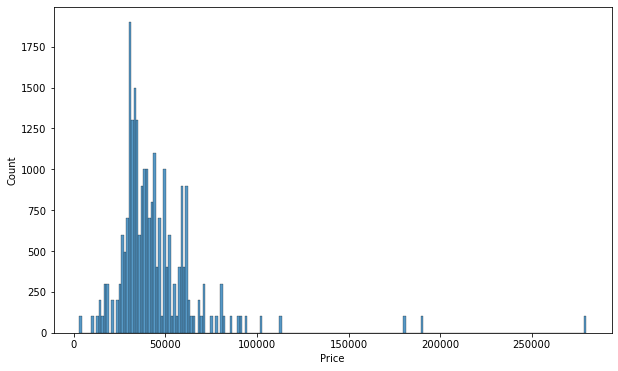

In [22]:
plt.figure(figsize = (10,6))
sns.histplot(data =df['Price'])

In [19]:
df.loc[df['Price'] > 150000]

,Manufacturer,Model,Made Year,Mileage,Price,Dealer,Ratings,Reviews
12,Lamborghini,Urus,2020,33209,279900,Motor Werks - Barrington Auto Mall,4.8,4656
49,Mercedes-Benz,G-Class,2020,16112,189987,Motor Werks - Barrington Auto Mall,4.8,4656
68,Mercedes-Benz,G-Class,2020,16277,179999,Mercedes Benz of Hoffman Estates,4.7,1061
261,Lamborghini,Urus,2020,33209,279900,Motor Werks - Barrington Auto Mall,4.8,4656
298,Mercedes-Benz,G-Class,2020,16112,189987,Motor Werks - Barrington Auto Mall,4.8,4656
...,...,...,...,...,...,...,...,...
24451,Mercedes-Benz,G-Class,2020,16112,189987,Motor Werks - Barrington Auto Mall,4.8,4656
24470,Mercedes-Benz,G-Class,2020,16277,179999,Mercedes Benz of Hoffman Estates,4.7,1061
24663,Lamborghini,Urus,2020,33209,279900,Motor Werks - Barrington Auto Mall,4.8,4656
24700,Mercedes-Benz,G-Class,2020,16112,189987,Motor Werks - Barrington Auto Mall,4.8,4656


**Price column seemed to have an outlier when visualised through boxplot and histogram. But on closer inspection of the respective data rows, it can be seen that those values are of luxury cars like Mercedes Benz, Lamborghini. So they are not outliers**

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

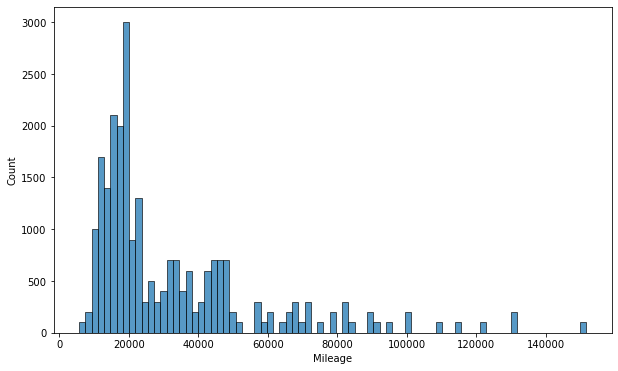

In [23]:
plt.figure(figsize = (10,6))
sns.histplot(data =df['Mileage'])

In [21]:
df.loc[df['Mileage'] > 99999]

,Manufacturer,Model,Made Year,Mileage,Price,Dealer,Ratings,Reviews
29,Chevrolet,Suburban,2015,130306,30995,Foxx Motor Sports,1.5,1
134,Chevrolet,Equinox,2011,151652,9988,Libertyville Chevrolet,4.3,929
142,BMW,X5,2013,114127,18990,Car City Inc,3.6,31
164,Dodge,Journey,2015,109135,14377,Monroe Superstore Dodge Chrysler Jeep RAM,4.5,312
231,Honda,Pilot,2005,101039,2800,Your Choice Autos Waukegan,4.1,92
...,...,...,...,...,...,...,...,...
24793,BMW,X5,2013,114127,18990,Car City Inc,3.6,31
24815,Dodge,Journey,2015,109135,14377,Monroe Superstore Dodge Chrysler Jeep RAM,4.5,312
24882,Honda,Pilot,2005,101039,2800,Your Choice Autos Waukegan,4.1,92
24892,GMC,Yukon,2013,122461,18962,Heller Ford,4.8,690


<AxesSubplot:xlabel='Mileage', ylabel='Price'>

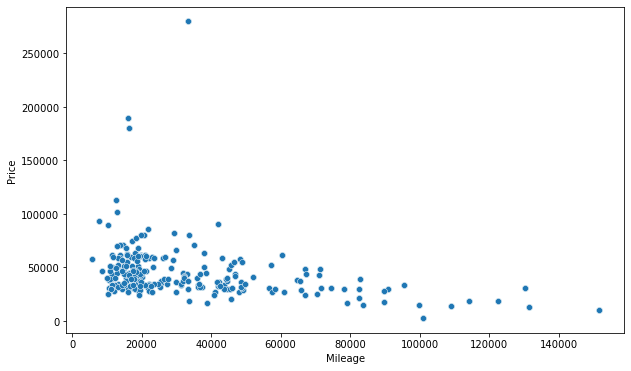

In [24]:
plt.figure(figsize = (10,6))
sns.scatterplot(data =df, x ='Mileage', y = 'Price')

**It can be seen that higher the Mileage, lower the price**

Text(0, 0.5, 'Price')

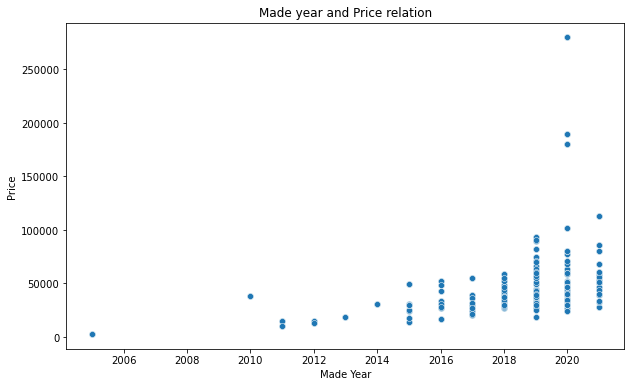

In [27]:
plt.figure(figsize = (10,6))
sns.scatterplot(data =df, x ='Made Year', y = 'Price')
plt.title("Made year and Price relation")
plt.xlabel("Made Year")
plt.ylabel("Price")

**It can be seen that newer the car, higher the price**

Text(0, 0.5, 'Price')

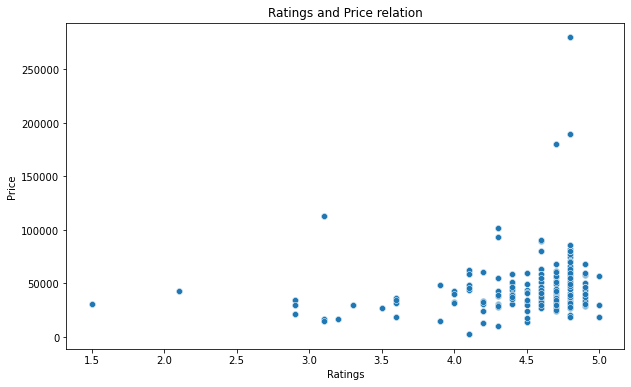

In [28]:
plt.figure(figsize = (10,6))
sns.scatterplot(data =df, x ='Ratings', y = 'Price')
plt.title("Ratings and Price relation")
plt.xlabel("Ratings")
plt.ylabel("Price")

**Higher the rating, higher the price**

In [25]:
#plt.figure(figsize = (15,8))
#sns.catplot(y="Price", hue="Manufacturer", kind="swarm", data= df)

In [26]:
data_heatmap = df.drop(df.columns[[0,1,5,7]],axis =1)
data_heatmap

,Made Year,Mileage,Price,Ratings
0,2018,31360,33489,4.8
1,2021,5665,58278,4.9
2,2012,99736,14985,3.9
3,2020,48705,35999,3.6
4,2018,13221,34995,4.9
...,...,...,...,...
24895,2016,89722,27996,4.8
24896,2020,44587,39990,4.0
24897,2018,46615,54987,4.8
24898,2018,33351,37500,4.4


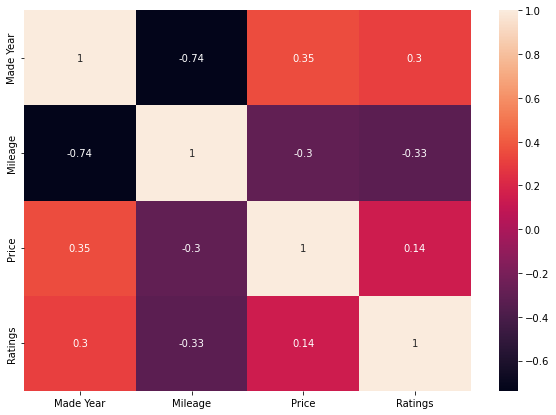

In [28]:
plt.figure(figsize=(10,7))
corr=data_heatmap.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True);

**As seen, Price has a strong correlation with Made Year and Mileage**

Text(0, 0.5, 'Price')

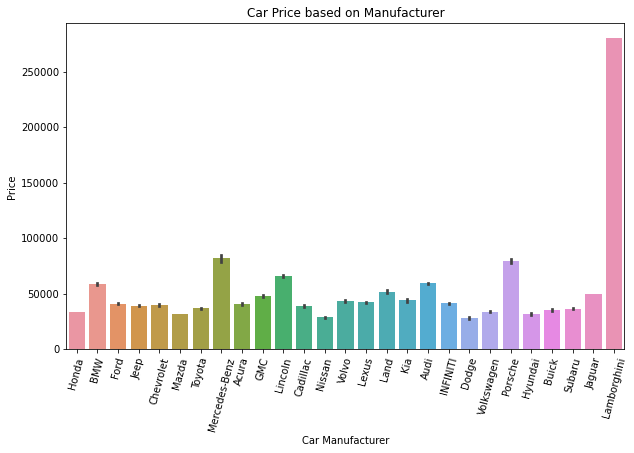

In [29]:
plt.figure(figsize=(10, 6))
hs = df['Manufacturer'].value_counts().index
sns.barplot(data=df, x='Manufacturer', y = 'Price', order=hs)
plt.xticks(rotation=75)
plt.title('Car Price based on Manufacturer')
plt.xlabel('Car Manufacturer')
plt.ylabel('Price')

In [52]:
y = df['Price']
X = df.drop(df.columns[[0,1,4,5,7]],axis =1)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [55]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)


The r2 is:  0.13270392782241947
The rmse is:  24406.256894978498
